# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Мы будем определять рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Для начала мы изучим данные в таблице: какие колонки содержит, какого типа данные в колонках, какие значения преобладают. Далее посмотрим на пропуски в данных и разберемся с ними: выясним почему они могли появиться и как их можно убрать, если можно. Потом по возможности изменим типы данных на более удобные для нас и удалим явные и неявные дубликаты. Далее добавим в таблицу новые колонки: цену за 1 м^2; день недели, месяц и год публикации; тип этажа квартиры; расстояние до центра. Следующим этапом мы изучим параметры:общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка. Найдем в них аномалии и удалим им, чтобы результаты были менее искаженными. Далее, по подготовленным данным мы изучим как быстро продавались квартиры и какие параметры больше всего повлияли на стоимость. Найдем населённые пункты с самой высокой и низкой стоимостью квадратного метра. Выясним как удаленность от центра влияет на стоимость квартир. И сделаем вывод исходя из получившейся информации.


### Загрузка данных

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info() #смотрим информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

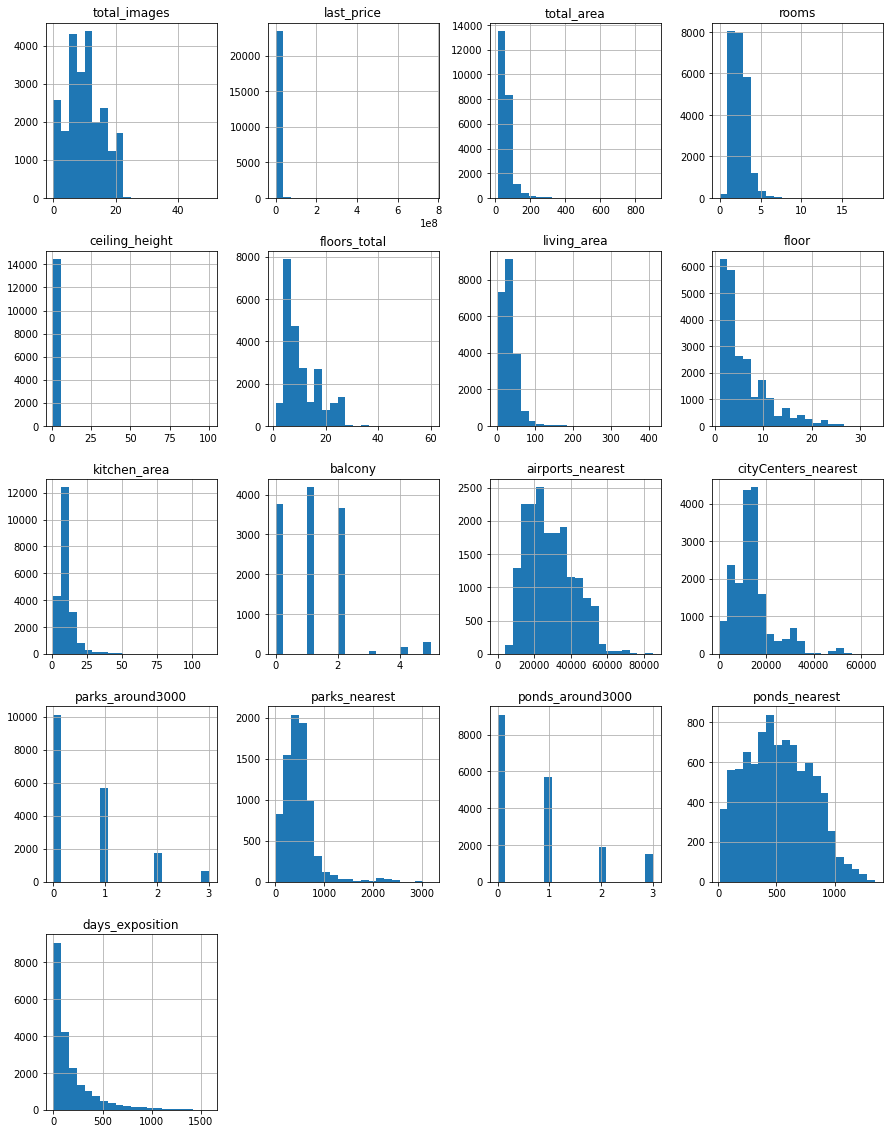

In [3]:
data.hist(bins=20, figsize=(15, 20)) #строим гистограммы числовых зачений

#### Вывод

В датафрейме в основном преобладают объявления с ~10 фотографиями. Самая встречающаяся этажность дома - 9 этажей. Самая популярная общая площадь - около 50 или чуть меньше метров, 1-2 комнаты. Этаж квартиры в основном - 1-5. Время с момента публикации объявления в основном порядка 50 дней. 

### Предобработка данных

#### Изучение и заполнение пропусков

In [4]:
#смотрим на пропуски в данных в процентах
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Практически во всех объявлениях не указано - апартаменты это или нет. В ~60% случаев не указано расстояние до ближайшего парка и водоема. В половине объявлений отсуствует информация о наличии балкона. В ~40% не указана высота потолков.В четверти объявлений не указана информация о расстоянии до аэропорта, до центра города, количество водоемов и парков в 3 км от дома (у этих данных процент одинаковый, а данные заполнялись автоматически,  видимо произошла ошибка в момент заполения). В 10% случаев не указано время размещения объявления, площадь кухни и жилая площадь.

In [5]:
#начнем со столбца is_apartment
data['is_apartment'].sum() / data['is_apartment'].count() * 100

1.8018018018018018

In [6]:
# Код ревьюера
data['is_apartment'].sample(20)

3113       NaN
17467      NaN
9218       NaN
15015      NaN
2845       NaN
4983       NaN
4482       NaN
14054      NaN
937        NaN
18157      NaN
1721       NaN
23330      NaN
2729     False
14805      NaN
16453      NaN
15186      NaN
12284      NaN
1361       NaN
19523      NaN
18751      NaN
Name: is_apartment, dtype: object

In [7]:
# так как из заполненных значений (около 3000), процент апартаментов состовляет меньше 2, то можно предположить, что
# пропуски в столбце означают, что жилье не является апартаментами, поэтому заполним пропущенные зачения False.
data['is_apartment'].fillna(False, inplace=True)

In [8]:
#переходим к балконам. если не указано количество балконов, можно преположить, что их нет в принципе, поэтому заполним
#пропущенные значения нулями.
data['balcony'].fillna(0, inplace=True)

In [9]:
#много, где не записана высота потолков. можно предположить, что она будет средней, как у других квартир. возьмем медианное
#значение, и заполним им пропуски.
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [10]:
#найдем отношение мединнанной общей площади к медианной жилой
median_living_ratio = data['total_area'].median() / data['living_area'].median() 
#найдем отношение мединнанной общей площади к медианной куханной
median_kitchen_ratio = data['total_area'].median() / data['kitchen_area'].median()

#заполним пропуски, поделив общую площадь на найденные выше коэффиценты
data['kitchen_area'] = data['kitchen_area'].where(~data['kitchen_area'].isna(), data['total_area'] / median_kitchen_ratio)
data['living_area'] = data['living_area'].where(~data['living_area'].isna(), data['total_area'] / median_living_ratio)

In [11]:
data = data.dropna(subset=['floors_total', 'locality_name']) #удалим строки, где не указано количество этажей в доме и где не
#указана локация(таких строк 0,4% и 0.2% соответсвенно,поэтому они не сыграют особой роли, но упрастят нам работу с данынми)

In [12]:
#посмотрим на обновленные данные
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

parks_nearest           65.924040
ponds_nearest           61.654997
airports_nearest        23.441545
cityCenters_nearest     23.343942
ponds_around3000        23.339699
parks_around3000        23.339699
days_exposition         13.456397
last_price               0.000000
locality_name            0.000000
balcony                  0.000000
kitchen_area             0.000000
total_images             0.000000
studio                   0.000000
is_apartment             0.000000
floor                    0.000000
living_area              0.000000
floors_total             0.000000
ceiling_height           0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Некоторые пропуски возникли в процессе ручного ввода данных, а некоторые в процессе автоматического.
Пользователь как правило ничего не указывал в колонке "is_apartment", так как подрозумевал, если у него не аппартаменты, то ничего писать не нужно. Аналогичего с колонкой "balcony" - если балкона не было, то он зачастую оставял пропуск. Были пропуски в разделах "kitchen_area" и "living_area". Они были возможно потому что пользователь не знал частичные площади, а знал только полную, либо потому что просто решил пропустить этот момент.
Пропуски в колонках, заполненных автоматически тоже присуствуют. Они связаны с работой программы. Возможно, если программа не обнаруживала водоем / парк центр в ближайшие несколько километров, то программа вставляла пустое значение (порядка 60% таких пропусков от всей таблицы). Так же есть 23% у колонок "airports_nearest", "cityCenters_nearest", "ponds_around3000", "parks_around3000", это может быть связано с тем, что программа не смогла определить адрес, указанный в объявлении.


#### Типы данных в таблице

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [14]:
#переведем некоторые колонки из float в int
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('Int64')
data['balcony'] = data['balcony'].astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('Int64')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64')
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['parks_nearest'] = data['parks_nearest'].astype('Int64')
data['ponds_nearest'] = data['ponds_nearest'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['days_exposition'] = data['days_exposition'].round(0).astype('Int64')


/tmp/ipykernel_389/3946253177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_price'] = data['last_price'].astype('int')
/tmp/ipykernel_389/3946253177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'] = data['floors_total'].astype('Int64')
/tmp/ipykernel_389/3946253177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [15]:
data.info() #посмотрим что получилось

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  int64  
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  Int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Мы перевели типа данных в некоторые столбцах их float в int. Затронули следующие столбы 'floors_total', 'balcony'- так как количество этажей и количество балконов- это целые числа.
Также заменили тип в столбцах 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest' - так как тут расстояние указанное в метрах - это целое число. И еще заменили тип в колонках 'parks_around3000', 'ponds_around3000', 'days_exposition' так как количество прудов/парков и время размещения объявления - целые числа.

#### Уникальные значения в столбце 'locality_name'

In [16]:
uniq1 = len(data['locality_name'].unique())# посмотрим кол-во уникальных значений
uniq1

364

In [17]:
data['locality_name'].unique() #посмотрим сами уникальные значения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
#уберем в названиях мест приставки (типа 'поселок', 'село' и тп), оставив только имена
data['locality_name'] = data['locality_name'].str.replace('ё', 'e') #заменили все 'ё' на 'е'
#заменяем все приставки на ''. село меняем  в конце, тк оно может навредить нам, если код заменит село на '' в слове 'поселок'
type_of_place = ['поселок', 'посeлок', 'городского', 'типа', 'коттеджный', 'городской', 'деревня', 'садоводческое', 'некоммерческое' 'товарищество', 'товарищество', 'садовое', 'станции', 'при', 'железнодорожной']
data['locality_name'] = data['locality_name'].replace(type_of_place, '', regex=True).replace('село', '', regex=True).str.strip()

/tmp/ipykernel_389/214449458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'] = data['locality_name'].str.replace('ё', 'e') #заменили все 'ё' на 'е'
/tmp/ipykernel_389/214449458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'] = data['locality_name'].replace(type_of_place, '', regex=True).replace('село', '', regex=True).str.strip()


In [19]:
#смотрим сейчас количество уникальных значений
uniq2 = len(data['locality_name'].unique()) 
uniq2

305

In [20]:
round((1 - uniq2 / uniq1) * 100) # посмотрим насколько процентов убавилось количество уникальных значений

16

Мы посмотрели список уникальных значений в столбце 'locality_name' и увидели, что есть дубилкаты из-за разных обозначений одних и тех же мест: где-то используются приставки 'поселок', 'поселок городского типа' и тп, а где-то их нет. Поэтому мы убрали все эти приставки, оставив только имена мест. Таким образом количество уникальных мест сократилось на 16%.

### Добавление в таблицу новых столбцов

In [21]:
data['price_per_square_meter'] = round(data['last_price'] / data['total_area'], 2) #посчтиаем стоимость квадртного метра и добавим ее в новую колонку
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #переведем столбец с датой публикации из object в datetime для дальнейщей работы с ним
data['day_number'] =  data['first_day_exposition'].dt.weekday #создаем новую колонку с номером дня недели, где 0 - это пн
data['month_number'] = (data['first_day_exposition']).dt.month #создаем колонку с номером месяца
data['year_number'] =  (data['first_day_exposition']).dt.year #создаем колонку с номером года

/tmp/ipykernel_389/2073027449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_square_meter'] = round(data['last_price'] / data['total_area'], 2) #посчтиаем стоимость квадртного метра и добавим ее в новую колонку
/tmp/ipykernel_389/2073027449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #переведем столбец с датой публикации из object в datetime для дальнейщей работы с ним
/tmp/ip

In [22]:
#создадим функцию для котегоризации по этажам и поместим значения каждого объявления в новую колонку 'floor_type'
def floor_type(arg):
    total = arg['floors_total']
    floor = arg['floor']
    if floor == total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

/tmp/ipykernel_389/1213010166.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floor_type'] = data.apply(floor_type, axis=1)


In [23]:
#создадим колонку с расстоянием до центра в км. для этого поделем на 1000 колонку с расстоянием в метрах и сделаем новый тип Int64, чтобы значения получились целами и можно было проигнорировать пустые строки не вызвав ошибку
data['distance_to_centr_in_km'] = (data['cityCenters_nearest'] / 1000).astype('Int64')

/tmp/ipykernel_389/2757730405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance_to_centr_in_km'] = (data['cityCenters_nearest'] / 1000).astype('Int64')


In [24]:
#посмотрим, что у нас получилось
pd.set_option('max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_number,month_number,year_number,floor_type,distance_to_centr_in_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>,120370.37,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000,2,Шушары,12817,18603,0,<NA>,0,<NA>,81,82920.79,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785.71,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,91.730769,9,False,False,False,27.825,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176.10,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.00,1,6,2018,другой,8


### Исследовательский анализ данных

#### Изучение различных параметров и их гистограммы

In [25]:
start = data.shape[0] #зафиксируем начальное количество объявлений
#посмотрим информацию о различных числовых параметрах
parameters = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total', 'cityCenters_nearest', 'parks_nearest']
data[parameters].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floors_total,cityCenters_nearest,parks_nearest
count,23565.000000,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,18064.000000,8030.000000
mean,60.322824,34.621108,10.499499,6.540058e+06,2.070656,2.724530,10.675875,14192.656056,490.580448
std,35.657060,22.399827,6.037444,1.091093e+07,1.078591,0.991026,6.594823,8613.348153,341.572956
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,1.000000,1.000000,181.000000,1.000000
25%,40.000000,19.000000,7.000000,3.400000e+06,1.000000,2.600000,5.000000,9238.000000,288.000000
50%,52.000000,30.000000,9.000000,4.646000e+06,2.000000,2.650000,9.000000,13096.500000,455.000000
75%,69.700000,42.115385,12.000000,6.790000e+06,3.000000,2.700000,16.000000,16285.000000,612.000000
max,900.000000,409.700000,112.000000,7.630000e+08,19.000000,100.000000,60.000000,65968.000000,3190.000000


In [26]:
#посмтрим информаицю о категориальном параметре
data['floor_type'].value_counts()

другой       17326
последний     3355
первый        2884
Name: floor_type, dtype: int64

<AxesSubplot:title={'center':'parks_nearest'}, xlabel='m'>

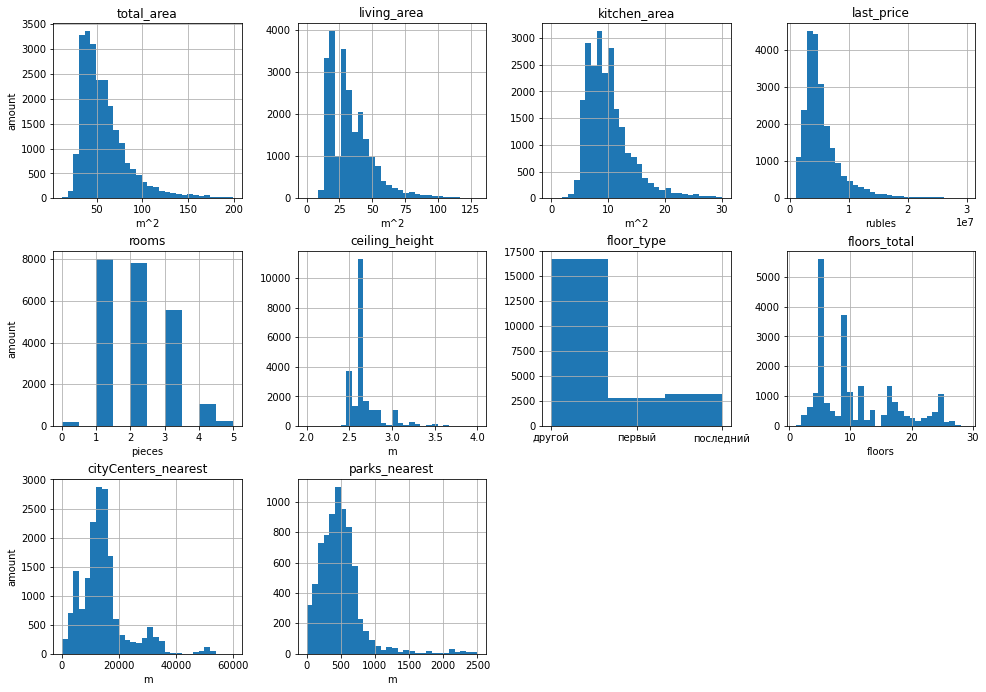

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12)) #cоздаем общее полотно
#настраиваем расстояние между графиками, чтобы названия одних графиков и названия осей других графиков не накладывались
plt.subplots_adjust(left=0.13, 
                    right=0.93, 
                    top=1.0, 
                    bottom= 0.27, 
                    wspace= 0.3, 
                    hspace=0.3)

plt.subplot(3, 4, 1)
data = data[data['total_area'] < 200]
plt.ylabel('amount')
plt.xlabel('m^2')
plt.title('total_area')
data['total_area'].hist(bins=30)

plt.subplot(3, 4, 2)
data = data[data['living_area'] < 130]
plt.xlabel('m^2')
plt.title('living_area')
data['living_area'].hist(bins=30, range=(0, 130))

plt.subplot(3, 4, 3)
data = data[data['kitchen_area'] < 30]
plt.xlabel('m^2')
plt.title('kitchen_area')
data['kitchen_area'].hist(bins=30, range=(0, 30))

plt.subplot(3, 4, 4)
data = data[data['last_price'] < 30000000]
plt.xlabel('rubles')
plt.title('last_price')
data['last_price'].hist(bins=30, range=(1000000, 30000000))

plt.subplot(3, 4, 5)
data = data[data['rooms'] < 6]
plt.xlabel('pieces')
plt.ylabel('amount')
plt.title('rooms')
data['rooms'].hist(bins=10, range=(0, 5))

plt.subplot(3, 4, 6)
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 4)]
plt.xlabel('m')
plt.title('ceiling_height')
data['ceiling_height'].hist(bins=30, range=(2, 4))

plt.subplot(3, 4, 7)
plt.title('floor_type')
data['floor_type'].hist(bins=3)

plt.subplot(3, 4, 8)
data= data[data['floors_total'] < 30]
plt.xlabel('floors')
plt.title('floors_total')
data['floors_total'].hist(bins=30)

plt.subplot(3, 4, 9)
plt.xlabel('m')
plt.ylabel('amount')
plt.title('cityCenters_nearest')
data['cityCenters_nearest'].hist(bins=30, range=(0, 60000))

plt.subplot(3, 4, 10)
plt.xlabel('m')
plt.title('parks_nearest')
data['parks_nearest'].hist(bins=30, range=(0, 2500))

In [28]:
finish = data.shape[0]
print('На сколько процентов уменьшилась наша база, после выброса необычных значений:', 100 - finish /start * 100)

На сколько процентов уменьшилась наша база, после выброса необычных значений: 3.6706980691703706


Мы изучили различные параметры и нашли выделяющиеся значения (либо исключительные объекты, либо неверно занесена информация). Поэтому были исключены некоторые объявления. Были исключены квартиры с площадью больше 200 м^2, жилой площадью > 130 м^2, кухней больше 30 м^2, стоимостью выше 30000000 рублей и с количеством комнат больше 5 - так как объекты по этим условиям редкие, и могут искажать общие данные. Были удалены обьяъвления с неккоректными высотами потолков - объекты, где высота потолков больше 4 метров или меньше 2 метров.
Получилось, что наиболее популярны квартиры плозадью около 50 м^2, жилой площадью 30 м^2, площадью кухни 10 м^2, высотой потолков 2.65 метра и стоимостью около 50000000 рублей.
По количеству комнат наиболее распространены объявления о продаже 1 и 2 комнатных квартир (примерно по 7000 объявлений), немного реже 3 комнатные квартиры (порядка 5000 объявлений).
По высоте домов чаще всего встречаются 5 этажные дома, немного реже 9 этажные, еще реже 16 этажные и  25 этажные. Квартиры в большинстве случаев находятся не на первом и на последнем этаже (около 16000 объявлений). На первом и последнем - встречаются примерно одинаково (по 3000 случаев).
Квартиры в большисве своем удалены от центра на расстояние порядка 15км, а рассстояние до ближайшего парка около 500 метров.

#### Как быстро продавались квартиры

In [29]:
data['days_exposition'].describe()

count    19752.000000
mean       177.461270
std        215.865105
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

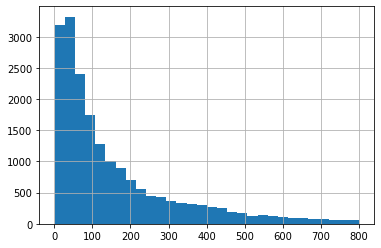

In [30]:
data['days_exposition'].hist(bins=30, range=(1, 800))

In [31]:
round(data['days_exposition'].mean())

177

In [32]:
data['days_exposition'].median()

93.0

Среднее время продажи квартиру составило 177 день, а медианное - 93 дня. Быстрыми продажами можно считать продажи за менее 50 дней, а необычно долгими за более 230 дней.

<AxesSubplot:>

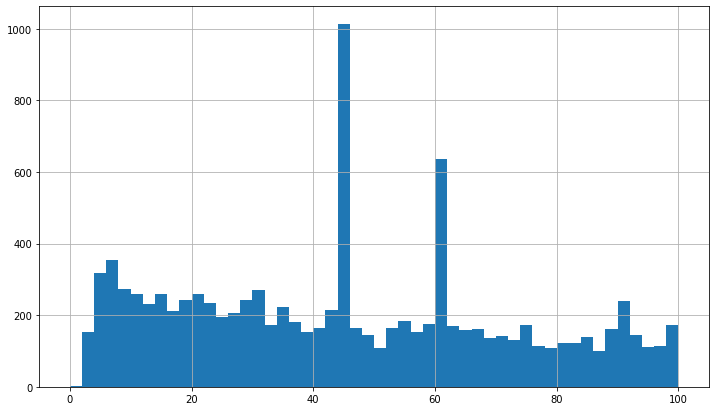

In [33]:
# Код ревьюера
data['days_exposition'].hist(bins=50, range=(0,100), figsize=(12, 7))

#### Факторы, влияющие на стоимость объекта

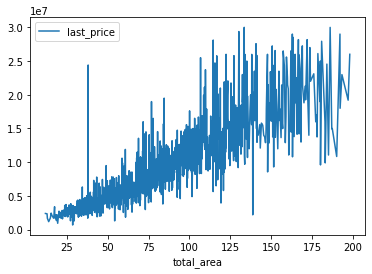

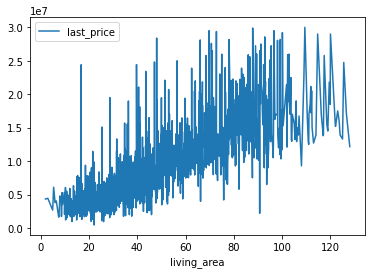

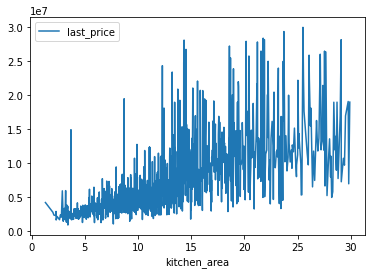

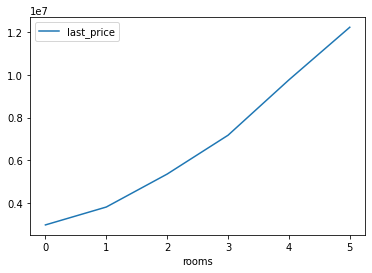

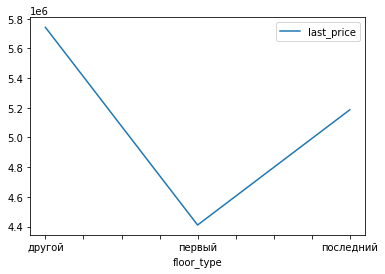

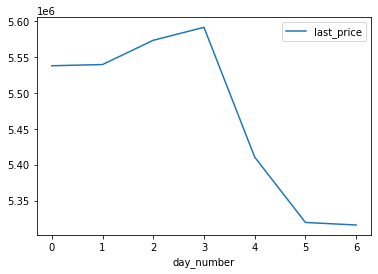

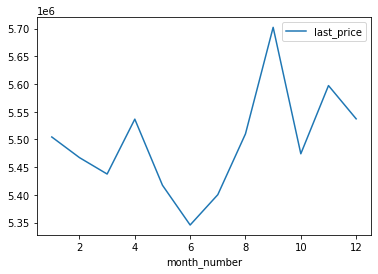

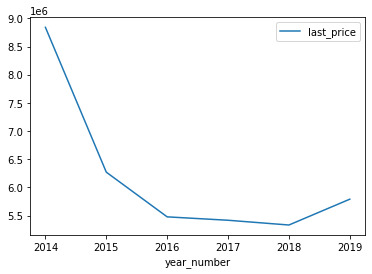

In [34]:
#построим графики, в которых отражена зависимость стоимости объекта от различных параметров
for i in ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'day_number', 'month_number', 'year_number']:
    data.pivot_table(index=i, values='last_price').plot()

In [35]:
data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']].corr()

,total_area,living_area,kitchen_area,rooms,last_price
total_area,1.000000,0.933438,0.580808,0.791525,0.769191
living_area,0.933438,1.000000,0.367591,0.866107,0.672673
kitchen_area,0.580808,0.367591,1.000000,0.223146,0.584470
rooms,0.791525,0.866107,0.223146,1.000000,0.478071
last_price,0.769191,0.672673,0.584470,0.478071,1.000000


Стоимость квартиры зависит от общей площади, жилой площади, количества комнат и чуть меньше от площали кухни. Со всеми этими параметрами у стоимости прямая корреляция. 
Этаж также играет свою роль: квартиры находящиеся на 1 этаже, стоят дешевле всего, квартиры находящиеся на последнем этаже, стоят дороже, но самые дорогие квартиры в среднем - это квартиры, находящиеся на иных этажах.
С днем публикации объявления тоже есть взаимосвязь: как правило в будние дни выкладываются более дорогие квартиры, а начиная с пятницы и до вс, средняя стоимость квартир в объявлениях падает. Возможно это связано с тем, что в будние дни объявляения выкладывают риелторы (и там более дорогие квартиры), а в выходные дни хозяива напрямую это делают (чтобы не нанимать риелторов), и как правило такие квартиры дешевле. 
Также есть некая сезонность: ближе к концу году, начиная с осени продают более дорогие квартиры.
Есть тенденция по годам: начиная с 2014 года средняя стоимость продаваемых квартиры снижается. К 2019 годду она упала с 9000000 рублей до 6000000 рублей. Исходя из матрицы корреляций видно, что стоимость сильно коррелирует c общем площадью (0.77). Поэтому можно сделать вывод о том, что с 2014 по 2019 года падает средняя площадь продаваемых объектов, больших по площади квартир все меньше, а малениких все больше. 

#### Средняя стоимость 1 м^2 в самых популярных локациях

In [36]:
#создаем сводную таблицу по 'locality_name' с двумя колонками общим количеством объявлений по каждому названию и 
#медианным значением по каждому названию. потом сортируем таблицу по убыванию по количество объявлений и делаем
#срез 10 самых популярных
svodnya_table = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'median']).sort_values(('count', 'price_per_square_meter'), ascending=False)[:10]
#переименовываем мультииндексы в обычные более понятные
svodnya_table.columns = ['amount', 'values'] 
#отсортируем таблицу по возрастанию стоимости 1 м^2
svodnya_table.sort_values('values')                                  

,amount,values
locality_name,,
Выборг,233,57894.740
Всеволожск,394,65737.870
Гатчина,305,67796.610
Колпино,337,74722.220
Шушары,437,76923.080
Мурино,583,86268.870
Парголово,326,91780.225
Кудрово,468,95675.475
Пушкин,354,99678.545


Самое дорогое жилье находится в Санкт-Петербурге, а самое дешевое в Выборге.

#### Зависимость стоимости квартир в Санкт-Петербурге от расстояния до центра

In [37]:
#делаем срез данных, чтобы был только Санкт-Петербург и строим сводную таблицу, где индексами является расстояние от центра,
#а значениями - стоимость объекта
svodnaya_table2 = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_to_centr_in_km', values='last_price', aggfunc='mean')
svodnaya_table2

,last_price
distance_to_centr_in_km,
0,1.086195e+07
1,1.078119e+07
2,9.704811e+06
3,9.275963e+06
4,1.026191e+07
5,9.562219e+06
6,9.138158e+06
7,8.404993e+06
8,7.865306e+06


<AxesSubplot:xlabel='distance_to_centr_in_km'>

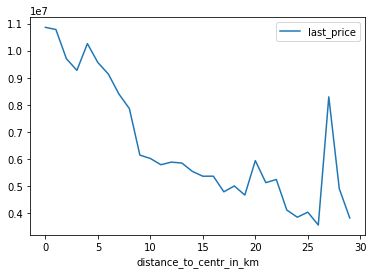

In [38]:
svodnaya_table2.plot()

Квартиры, находящиеся на расстоянии до 3х км до центра - имеют наибольшую среднюю стоимость. Дальше происходит спад по стоимости в зависимости от удаления от центра, так происходит до 10км от центра. Стоимость квартир на расстонии от 10 км до 20 км примерно равная. а дальше слабо убывает. Присутсвует повышенная стоимость квартир в области 27км  от центра. Это может быть связано с тем, что там есть опредленная инфраструктура,  которая повышает стоимость квартир,  либо там построен примиальный комплекс с повышенной средней стоимостью квартир.

### Вывод

Был проведен исследовательских анализ данных и установлены параметры, влияющие на стоимость квартиры.
Во-первых, это локация: в Санкт-Петербурге квартиры стоят дороже, чем в других городах из области, и чем ближе к центру, тем дороже. Средняя стомость квадратного метра в Санкт-Петербурге составляет порядка 104000 рублей, что является самой дорогой в области. Чуть меньше стоимость в Пушкино (около 100000 рублей) и Кудрово (около 96000 рублей). Самая низкая стоимость за 1 квадратный метр держится в Выборге и состовляет 58000 рублей. Стоимость имеет прямую корреляцию с расстоянием до центра. В Санкт-Петербурге квартиры на расстоянии до 5 км от центра продаются по 10000000 рублей, на расстоянии от 5 км до 10 км - примерно 7000000 рублей, на расстоянии от 10 км до 25 км стомость снижается но не сильно - от 6000000 рублей до 5000000 рублей. Присуствует локальный пик стоимости на растоянии 27 км от центра - там стоимость квартир поднимается свыше 8000000 рублей. Это может быть связано с тем, что там постоили дорогой комплекс, либо это особенный район с хорошими условиями проживания. 
Во-вторых, это площадь, как общая, так и жилая: чем больше, тем дороже. Корреляция между площадью и стомости составляет порядка 0.77. Большиство продаваемых квартир имееют площадь около 50 метров, а самыми популярные по количеству комнат - 1 и 2 комантные квартиры (таких объявлений примерно по 8000), менее популярные - 3 комантные (порядка 5000 объявлений).
Также на стоимость влияет этаж, как правило квартиры находящиеся на первом или последнем этаже стоят дешевле, чем другие кваритры.
С течением времени с 2014 по 2019 наблюдается тенденция снижения площади продаваемых объектов, и как следствие цены стоимости объявлений. В 2014 году стоимость продажи были порядка 8000000-9000000 рублей, что говорит нам о квартирах порядка 100 м^2, а к 2019 снизилась до 6000000, что характеризиует кварты порядка 50-70 м^2. То есть стало продаваться больше однокомнтаных и двухкомнатных квартир, чем трехкомантных. Это может быть связано с постройкой новых домов, где присуствует много небольших квартир.
Среднее время продажи квартиры составляет порядка 90 дней с момента публикации объявления. Быстрыми продажами можно назвать продажи сделанные примерно за 50 дней, а долгими - продажи за 230 дней.